In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day = pd.read_csv("day.csv")

In [4]:
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour = pd.read_csv("hour.csv")

In [6]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
a = day.isnull().values.sum()
b = hour.isnull().values.sum()
print("Null values of day  ",a, " \nNull values of hour dataset ", b)

Null values of day   0  
Null values of hour dataset  0


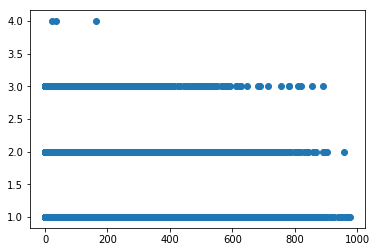

In [9]:
plt.scatter(hour["cnt"], hour["weathersit"])


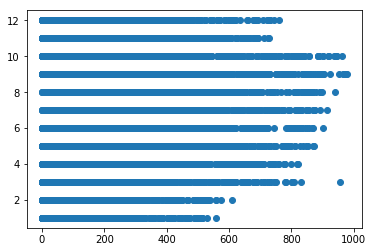

In [10]:
plt.scatter(hour["cnt"], hour["mnth"])


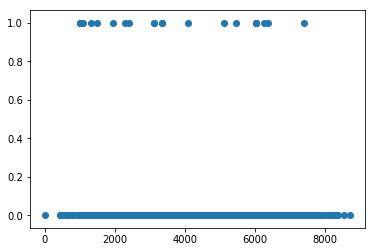

In [11]:
plt.scatter(day["cnt"], day["holiday"])


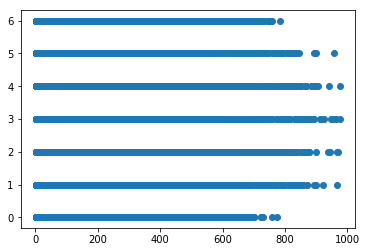

In [13]:
plt.scatter(hour["cnt"], hour["weekday"])

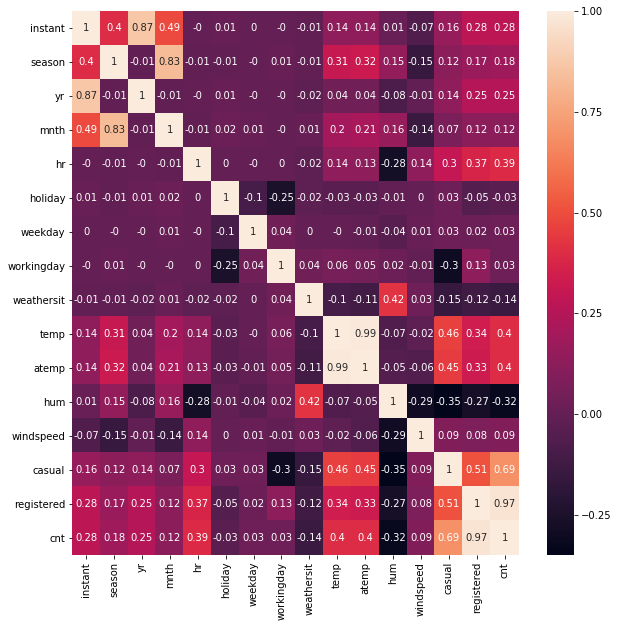

In [14]:
correlation_matrix = hour.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, ax = ax)

### Observations:
1. Bikes are mostly sold when the weather is clear and during working days.
2. Bikes are rarey sold during the winter season and holidays.
3. Out of total count of bike rentals most of them are registered users.

In [15]:
# Adding date to the dataset feature by converting timestamp dteday feature

day['dteday'] = pd.to_datetime(day['dteday'])    
day['year'] = day['dteday'].dt.year
day['month'] = day['dteday'].dt.month
day['day'] =  day['dteday'].dt.day

In [16]:
# Splitting the dataset to training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
day_train,day_test,day_label_train,day_label_test=train_test_split(day.drop(["cnt","instant","yr","mnth","holiday","weekday","dteday"], axis=1),day["cnt"],test_size=0.3,random_state = 23)

In [17]:
# Resetting the index values
day_train = day_train.reset_index(drop = True)
day_label_train = day_label_train.reset_index(drop = True)
day_test = day_test.reset_index(drop = True)
day_label_test = day_label_test.reset_index(drop = True)

In [18]:
day_train.head()

,season,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,year,month,day
0,3,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,2011,8,15
1,1,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,2012,12,29
2,3,1,1,0.719167,0.654688,0.519167,0.141796,1338,6267,2012,8,16
3,2,1,1,0.606667,0.574500,0.776667,0.185333,773,3300,2011,4,25
4,1,1,1,0.313333,0.309346,0.526667,0.178496,310,3841,2012,2,3


In [24]:
# Applying Linear Regression model
model = LinearRegression().fit(day_train, day_label_train)
predicted = model.predict(day_train)

In [25]:
 #RMSE for Train data
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(day_label_train, predicted)))
rmse

8.90278434401679e-13

In [26]:
# RMSE for Test data
predicted_test = model.predict(day_test)
rmse_test = (np.sqrt(mean_squared_error(day_label_test, predicted_test)))
rmse_test

8.720754626443245e-13

In [27]:
# R^2 for train data
r_squared = r2_score(day_label_train,predicted)
r_squared


1.0

In [28]:
# R^2 for test data
r_squared_test = r2_score(day_label_test,predicted_test)
r_squared_test

1.0